In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = yf.download('BTC-USD', '2010-01-01', '2025-01-01', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [22]:
data=pd.DataFrame(data)

In [23]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-12-27,94164.859375,94164.859375,97294.843750,93310.742188,95704.976562,52419934565
2024-12-28,95163.929688,95163.929688,95525.898438,94014.289062,94160.187500,24107436185


In [24]:
data.reset_index(inplace=True)

In [25]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...,...
3754,2024-12-27,94164.859375,94164.859375,97294.843750,93310.742188,95704.976562,52419934565
3755,2024-12-28,95163.929688,95163.929688,95525.898438,94014.289062,94160.187500,24107436185
3756,2024-12-29,93530.226562,93530.226562,95174.875000,92881.789062,95174.054688,29635885267


In [26]:
data.drop(columns=['Date','Adj Close','Open','Low','Volume','High'],inplace=True)

C:\Users\Kavindhya\AppData\Local\Temp\ipykernel_14720\2735078579.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns=['Date','Adj Close','Open','Low','Volume','High'],inplace=True)


In [27]:
data

Price,Close
Ticker,BTC-USD
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014
...,...
3754,94164.859375
3755,95163.929688
3756,93530.226562


<function matplotlib.pyplot.show(close=None, block=None)>

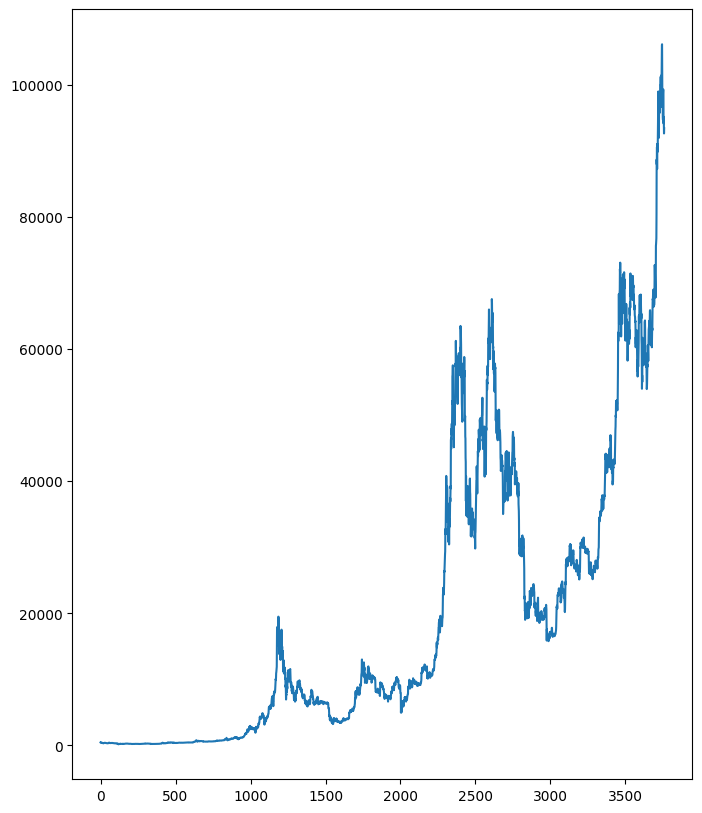

In [28]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show

In [29]:
train_data = data[:-100]
test_data = data[-100:]

In [30]:
train_data.shape

(3659, 1)

In [31]:
test_data.shape

(100, 1)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
train_data_scale = scaler.fit_transform(train_data)

In [34]:
base_days = 100

In [35]:
x = []
y = []
for i in range(base_days,train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [36]:
x , y = np.array(x) , np.array(y)

In [37]:
x = np.reshape(x, (x.shape[0], x.shape[1],1))

In [38]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [39]:
model= Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\Kavindhya\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer = 'adam' , loss='mean_squared_error')

In [42]:
model.fit(x, y, epochs=50, verbose=1)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 201ms/step - loss: 0.0180
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - loss: 0.0059
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - loss: 0.0050
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - loss: 0.0051
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - loss: 0.0046
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - loss: 0.0045
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - loss: 0.0039
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 193ms/step - loss: 0.0040
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - loss: 0.0035
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - loss: 0.0041
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 199ms/step - loss: 0.0034
Epoch 12/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 24s 209ms/step - loss: 0.0032
Epoch 13/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - loss: 0.0031
Epoch 14/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 24s 214ms/step - loss: 0.0031
Epoch 15/50
112

In [43]:
test_data = pd.concat((train_data.tail(100),test_data),ignore_index=True)

In [44]:
test_data

Price,Close
Ticker,BTC-USD
0,66191.000000
1,66639.046875
2,66490.296875
3,65140.746094
4,64960.296875
...,...
195,94164.859375
196,95163.929688
197,93530.226562


In [45]:
test_data_scale = scaler.transform(test_data)

In [46]:
x = []
y = []
for i in range(base_days,train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [47]:
x, y = np.array(x), np.array(y)

In [48]:
x = np.reshape(x, (x.shape[0], x.shape[1],1))

In [49]:
pred = model.predict(x)

112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


In [50]:
pred 

array([[0.05368754],
       [0.05367485],
       [0.0536626 ],
       ...,
       [0.81082094],
       [0.82011944],
       [0.8301476 ]], shape=(3559, 1), dtype=float32)

In [51]:
pred = scaler.inverse_transform(pred)

In [52]:
pred

array([[ 4092.2146],
       [ 4091.289 ],
       [ 4090.396 ],
       ...,
       [59291.33  ],
       [59969.24  ],
       [60700.348 ]], shape=(3559, 1), dtype=float32)

In [53]:
#future Bitcoin Price

In [54]:
y

array([0.00205501, 0.00188957, 0.00190845, ..., 0.86433757, 0.86710641,
       0.87058861], shape=(3559,))

In [55]:
m = y.reshape(-1,1)   # ensure correct shape
z = []

future_days = 30
last_sequence = m[-base_days:]  # take the last `base_days` values

for i in range(future_days):
    inter = last_sequence.reshape(1, base_days, 1)
    pred = model.predict(inter, verbose=0)
    z.append(pred[0][0])
    
    # update sequence for next prediction
    last_sequence = np.append(last_sequence[1:], pred).reshape(-1,1)



In [56]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [57]:
z

array([[61298.16 ],
       [61412.21 ],
       [61110.45 ],
       [60563.004],
       [59939.863],
       [59359.992],
       [58881.91 ],
       [58517.844],
       [58253.098],
       [58062.223],
       [57919.445],
       [57803.605],
       [57699.61 ],
       [57598.098],
       [57494.215],
       [57386.4  ],
       [57275.113],
       [57162.004],
       [57049.066],
       [56938.24 ],
       [56831.113],
       [56728.81 ],
       [56631.96 ],
       [56540.766],
       [56455.125],
       [56374.71 ],
       [56299.25 ],
       [56228.414],
       [56161.816],
       [56099.117]], dtype=float32)

In [58]:
model.save('Bitcoin_Price_Prediction_Model.keras')